In [ ]:
#Problem Statement:
#You are given a dataset containing information about the passengers of the Titanic. Your task is to perform exploratory data analysis (EDA) on the dataset using the following methods:
#● Load the dataset(Titanic.csv) into a pandas dataframe and print the first 5 rows using the head() method.
#● Use the info() method to get information about the dataset. In particular, pay attention to the data types of each column and whether there are any missing values.
#● Use the describe() method to describe the dataset. Pay attention to the range of values for each numeric column and whether there are any outliers.
#● Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class.
#● Use the value_counts() method to get the frequency count of the Embarked column.
#● Create a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.
#● Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.
#● Create a bar chart that shows the total number of passengers in each age range.
#● Create a scatter plot that shows the relationship between age and fare. Color the points based on whether the passenger survived or not.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [ ]:
#● Load the dataset(Titanic.csv) into a pandas dataframe and print the first 5 rows using the head() method.

In [22]:
titanic = sns.load_dataset("titanic") # loading Dataset using scikit learn

In [23]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [24]:
titanic.head(5) # Using Head Function

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#● Use the info() method to get information about the dataset. In particular, pay attention to the data types of each column and whether there are any missing values.

In [25]:
titanic.info() # Using INFO Function

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
#● Use the describe() method to describe the dataset. Pay attention to the range of values for each numeric column and whether there are any outliers.

In [26]:
titanic.describe() # Using Describe Function

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
#● Use the groupby() method to group the data based on the Pclass column and calculate the mean fare for each class.

In [27]:
mean_fare_by_class = titanic.groupby("pclass")["fare"].mean()  #Using Groupby Function and Then calculating Mean 

In [28]:
mean_fare_by_class

pclass
1    84.154687
2    20.662183
3    13.675550
Name: fare, dtype: float64

In [ ]:
#● Use the value_counts() method to get the frequency count of the Embarked column.

In [29]:
embarked_count = titanic["embarked"].value_counts()  #Using Value_counts

In [30]:
embarked_count

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [ ]:
#● Create a new column in the dataframe called AgeRange that categorises passengers into age ranges: "Child" for ages 0-12, "Teen" for ages 13-19, "Adult" for ages 20-59, and "Senior" for ages 60 and above.

In [31]:
def categorise_age(age):
    if age <= 12:
        return "Child"
    elif age > 12 and age <= 19:
        return "Teen"
    elif age > 19 and age <= 59:
        return "Adult"
    else:
        return "Senior"
    
titanic["AgeRange"] = titanic["age"].apply(categorise_age)

In [32]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,AgeRange
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,Adult
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,Adult
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,Adult
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,Adult
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True,Adult
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True,Teen
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False,Senior
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True,Adult


In [ ]:
#● Use the pivot_table() method to create a pivot table that shows the survival rate of passengers based on their sex, class, and age range.

In [33]:
pivot_table = titanic.pivot_table(index = ["sex","class","AgeRange"], values = ["survived"])

In [34]:
pivot_table

survived
sex    class  AgeRange          
female First  Adult     0.970588
              Child     0.000000
              Senior    1.000000
              Teen      1.000000
       Second Adult     0.896552
              Child     1.000000
              Senior    1.000000
              Teen      1.000000
       Third  Adult     0.392857
              Child     0.478261
              Senior    0.604651
              Teen      0.590909
male   First  Adult     0.425000
              Child     1.000000
              Senior    0.200000
              Teen      0.250000
       Second Adult     0.052632
              Child     1.000000
              Senior    0.230769
              Teen      0.100000
       Third  Adult     0.139785
              Child     0.360000
              Senior    0.091837
              Teen      0.078947

In [ ]:
#● Create a bar chart that shows the total number of passengers in each age range.

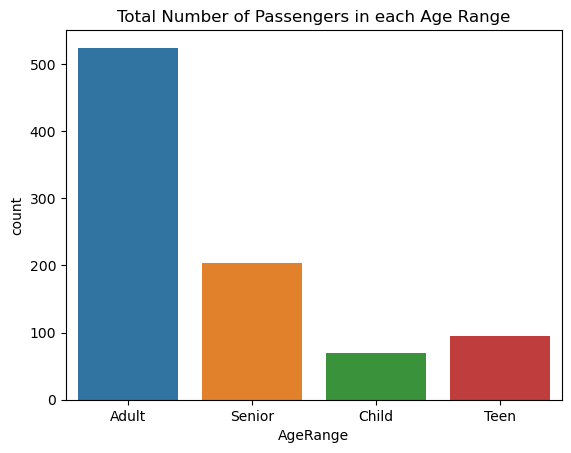

In [39]:
sns.countplot(x = "AgeRange", data = titanic)     #Creating BarChart Using sns.countplot
plt.title("Total Number of Passengers in each Age Range")
plt.show()

In [ ]:
#● Create a scatter plot that shows the relationship between age and fare. Color the points based on whether the passenger survived or not.

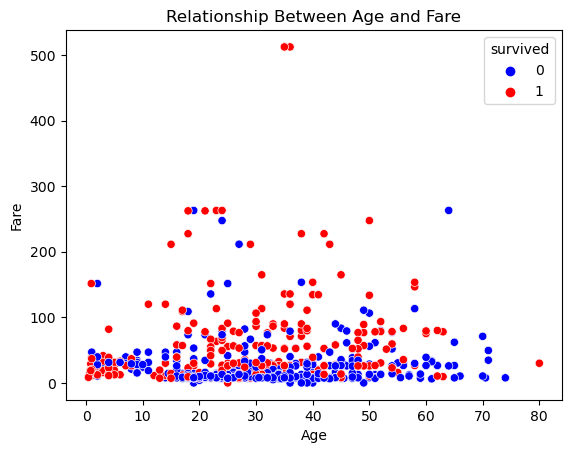

In [46]:
sns.scatterplot(x = "age", y = "fare", hue = "survived", data = titanic, palette = ["blue", "red"]) #Creating Scatterplot Using sns.scatterplot
plt.title("Relationship Between Age and Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()